In [1]:
import numpy as np
import matplotlib. pyplot as plt
np.random.seed(2021)

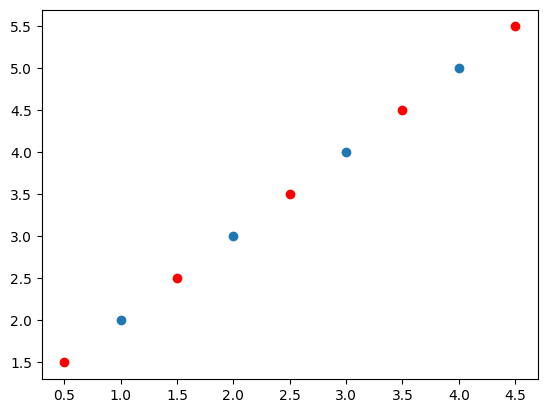

In [2]:
#데이터 준비 (1D regression)

X = np.array([[1],[2],[3],[4]])
y = np.array([2,3,4,5]) #행렬 계산을 위한 준비

new_X =np.array([[0.5],[1.5],[2.5],[3.5],[4.5]])
new_y = np.array([1.5,2.5,3.5,4.5,5.5])

plt.scatter(X,y)
plt.scatter(new_X, new_y, color='red')
plt.show() #빨간색에 대해 예측을 수행하게 됨

In [3]:
#모델 설계

class LinearRegression():
    def __init__(self,dim):
        #y = w1x1 + w2x2 + w3x3...w(dim)*(dim)+b
        self.w = np.random.randn(dim)
        self.b = 0
        #입력 평균 - > 0 따라서 표준화 시켜줘야 함(데이터 평균을 0으로, 분산은 1로 만들어줌)
        self.running_mean = np.zeros(dim)
        self.running_var = np.ones(dim)

    def fit(self, X, y):
        #표준화
        self.running_mean = X.mean(axis=0) #축이 0 -> 각각의 feature 평균값을 구하는 것 축이 1 - > 각각의 datapoint 평균값
        self.running_var = X.var(axis=0)
        X_norm = (X-self.running_mean)/np.sqrt(self.running_var + 1e-8)

        #슬라이드에 식 참조 WLS, BLS 부분 식
        self.w = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y) #행렬곱 - dot
        self.b = np.mean(y, axis=0)

    def loss(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y-y_pred)**2) #예측 값과 실제 차이

    def predict(self, X):
        X_norm = (X-self.running_mean)/np.sqrt(self.running_var + 1e-8)
        return X_norm.dot(self.w) + self.b

initial training loss 0.3474957669460639
initial training loss 0.5265498662539042
trained training loss 0.0
trained training loss 9.860761315262648e-33


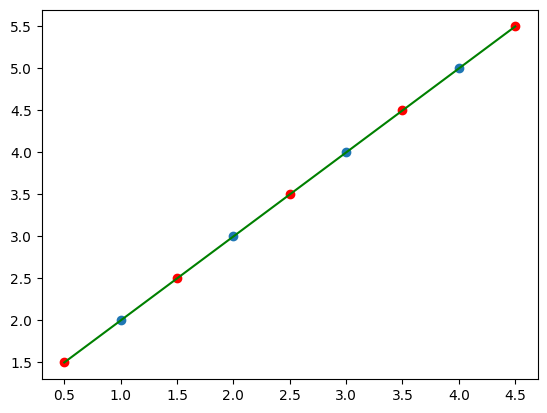

In [4]:
model = LinearRegression(dim=1)
print('initial training loss', model.loss(X,y))
print('initial training loss', model.loss(new_X,new_y))
model.fit(X,y)
print('trained training loss', model.loss(X,y))
print('trained training loss', model.loss(new_X,new_y))

plt.scatter(X,y)
plt.scatter(new_X, new_y, color='red')
plt.plot(new_X, model.predict(new_X), color='green')
plt.show()

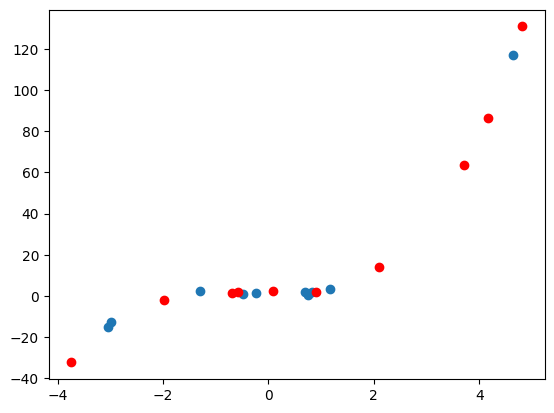

In [5]:
bias = 1
beta = np.array([-1,1,1,0]).reshape(4,1)
#y =aX^4+bX^3+c^X2 + dX + e
# -> y

#training set

noise = np.random.randn(10,1)
X = np.random.uniform(-5,5,(10,1))
X_ploy = np.hstack([X, X**2, X**3, X**4]) #수평으로 쌓아올린다는 말, 행렬배열

y=bias + X_ploy.dot(beta)
y = y+noise #noise : 말 그대로 잡음. 현실 데이터에는 데이터 무작위성을 넣어줄 수 있다

noise = np.random.randn(10,1)
new_X = np.random.uniform(-5,5,(10,1))
X_ploy = np.hstack([new_X, new_X**2, new_X**3, new_X**4])

new_y=bias + X_ploy.dot(beta)
new_y = new_y+noise

plt.scatter(X,y)
plt.scatter(new_X, new_y, color='red')
plt.show()

In [11]:
#모델 설계

class PolyRegression():   #종속변수 하나, 하나 이상의 독립변수로 이루어짐 비선형 데이터 처리시 유리
    def __init__(self,dim, order):
        #y = w1x1 + w2x2 + w3x3...w(dim)*(dim)+b
        self.w = np.random.randn(dim*order)
        self.b = 0
        #입력 평균 - > 0 따라서 표준화 시켜줘야 함(데이터 평균을 0으로, 분산은 1로 만들어줌)
        self.running_mean = np.zeros(dim*order)
        self.running_var = np.ones(dim*order)
        self.order = order

    def fit(self, X, y):
        X = np.hstack([X**i for i in range(1, self.order+1)])
        #order =3 -> X = [X**1, X**2, X**3]
        #표준화
        self.running_mean = X.mean(axis=0) #축이 0 -> 각각의 feature 평균값을 구하는 것 축이 1 - > 각각의 datapoint 평균값
        self.running_var = X.var(axis=0)
        X_norm = (X-self.running_mean)/np.sqrt(self.running_var + 1e-8)

        #슬라이드에 식 참조 WLS, BLS 부분 식
        self.w = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y) #행렬곱 - dot
        self.b = np.mean(y, axis=0)


    def loss(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y-y_pred)**2) #예측 값과 실제 차이

    def predict(self, X):
        X = np.hstack([X**i for i in range(1, self.order+1)])
        X_norm = (X-self.running_mean)/np.sqrt(self.running_var + 1e-8)
        return X_norm.dot(self.w) + self.b

initial training loss 2321.242996184237
initial test loss 4103.332553135416
trained training loss 0.28268747929434346
trained test loss 0.6017170206557421


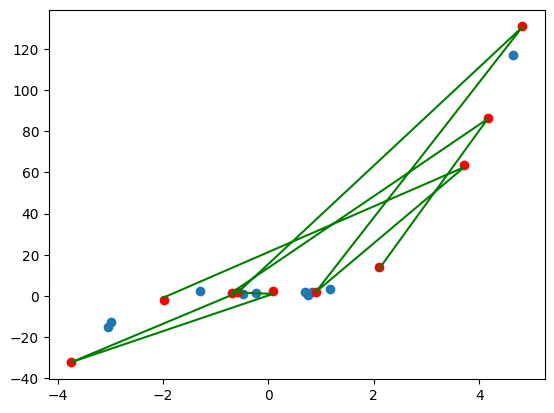

In [13]:
model = PolyRegression(1,3)
print('initial training loss', model.loss(X,y))
print('initial test loss', model.loss(new_X,new_y))
model.fit(X,y)
print('trained training loss', model.loss(X,y))
print('trained test loss', model.loss(new_X,new_y))

plt.scatter(X,y)
plt.scatter(new_X, new_y, color='red')
plt.plot(new_X, model.predict(new_X), color='green')
plt.show()